### Evidencia 2 - Punto 1

In [86]:
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [88]:
# crea dataset sintetico, 100 rows y 3 clases
x, y = datasets.make_blobs(n_samples=500, centers=3, n_features=3, random_state=0)
x.shape

(500, 3)

In [89]:
# division del dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [90]:
# reduccion de la dimensionalidad usando 2 componentes
lda = LinearDiscriminantAnalysis(n_components = 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [91]:
x_train.shape

(400, 2)

In [92]:
def graficar(x1, x2, y):
    scatter_plot = plt.scatter(x1, x2,c=y, vmin=min(y), vmax=max(y), s=35)
    plt.show()

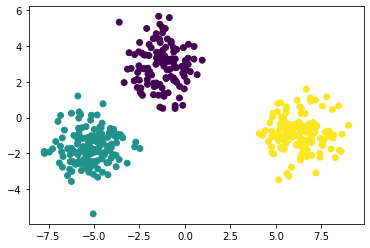

In [93]:
# grafica de los datos del x_train
graficar(x_train[:,0], x_train[:,1] , y_train)

#### Clasificacion usando un arbol de decision

In [94]:
# instancia del modelo de Arbol de Clasificacion
arbol_decision = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [95]:
# entrenamiento del modelo
modelo_entrenado = arbol_decision.fit(x_train, y_train)

In [96]:
# prediccion del tipo de nivel de glucosa usando los datos de prueba
y_pred = modelo_entrenado.predict(x_test)

#### Evaluacion del Modelo

In [97]:
# uso de la matriz de confusion para evaluacion del modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[45,  0,  0],
       [ 0, 27,  0],
       [ 0,  0, 28]], dtype=int64)

In [98]:
def EvaluacionModelo(y_test, y_pred):
    pre_s = metrics.precision_score(y_test, y_pred, average='micro')
    rec_s = metrics.recall_score(y_test, y_pred, average='micro')
    f1_s = metrics.f1_score(y_test, y_pred, average='micro')
    accu_s = metrics.accuracy_score(y_test, y_pred)
    return (pre_s, rec_s, f1_s, accu_s)

In [99]:
precision, recall, f1, accuracy = EvaluacionModelo(y_test, y_pred)
print(f"Precision: {precision}, Recall: {recall}, F1: {f1}, Accuracy: {accuracy}")

Precision: 1.0, Recall: 1.0, F1: 1.0, Accuracy: 1.0


#### Conclusion
El resultado de la evaluacion del modelo puede indicar un sobreajuste del modelo ya que ha podido clasificar correctamente todos los datos.